<a href="https://colab.research.google.com/github/WHARN0/Pengolahan-Citra-dan-Visi-Komputer/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tugas Praktikum**


1. Buat Gamma Correction sesuai dengan petunjuk berikut

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


 Gamma Correction pada citra 
-----------------------------
Masukkan nilai Gamma: 3


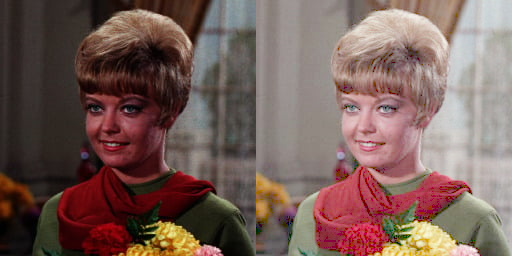

In [22]:
from __future__ import print_function
import numpy as np
import argparse
import cv2 as cv
from google.colab.patches import cv2_imshow

female1 = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')

imgTgs1 = female1.copy()

def adjust_gamma(image, gamma=1.0):
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	return cv.LUT(image, table)

print(' Gamma Correction pada citra ')
print('-----------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

adjusted = adjust_gamma(image=imgTgs1, gamma=gamma)
cv2_imshow(np.hstack([imgTgs1, adjusted]))

2. Buat Simulasi Image Depth

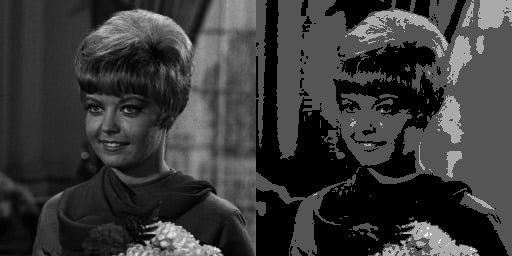

In [23]:
imgTgs2 = female1.copy()

bit_depth = 2
level = 255/ (pow (2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape,original.dtype)

for i in range(original.shape[0]):
  for j in range(original.shape[1]):
    depth_image[i,j] = round((original[i,j]/level))*level

final_frame = cv.hconcat((original,depth_image))
cv2_imshow(final_frame)

3. Buat modul Average Denoising

In [27]:
import glob
imgTgs3 = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images/noises/*.jpg'):
  n= cv.imread(img)
  imgTgs3.append(n)

In [29]:
def PNSR(img1,img2):
  mse = np.mean((img1-img2)**2)
  if mse == 0:
    return 100
  max_pixel = 255.0
  psnr = 20*np.log10(max_pixel/np.sqrt(mse))
  return psnr

def averageDenoising(index):
  denoised_image = np.zeros_like(imgTgs3[0], dtype=np.float32)
  for i in range(index):
    denoised_image += imgTgs3[i].astype(np.float32)

  return denoised_image

5 Jumlah Citra di Average

29.1263949218811


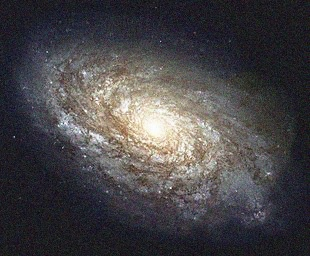

In [30]:
denoised_image_5 = averageDenoising(5)
denoised_image_5 /= 5
denoised_image_5 = np.uint8(denoised_image_5)
print(PNSR(imgTgs3[0],denoised_image_5))
cv2_imshow(denoised_image_5)

10 Jumlah Citra di Average

29.022257344293784


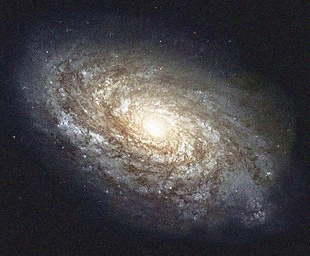

In [31]:
denoised_image_10 = averageDenoising(10)
denoised_image_10 /= 10
denoised_image_10 = np.uint8(denoised_image_10)
print(PNSR(imgTgs3[0],denoised_image_10))
cv2_imshow(denoised_image_10)

20 Jumlah Citra di Average

28.953959358414878


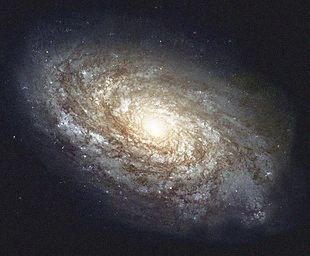

In [32]:
denoised_image_20 = averageDenoising(20)
denoised_image_20 /= 20
denoised_image_20 = np.uint8(denoised_image_20)
print(PNSR(imgTgs3[0],denoised_image_20))
cv2_imshow(denoised_image_20)

40 Jumlah Citra di Average

28.944279663740073


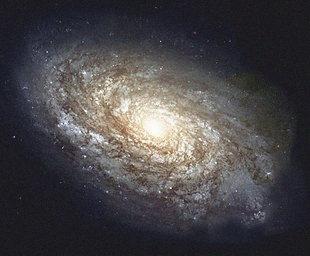

In [33]:
denoised_image_40 = averageDenoising(40)
denoised_image_40 /= 40
denoised_image_40 = np.uint8(denoised_image_40)
print(PNSR(imgTgs3[0],denoised_image_40))
cv2_imshow(denoised_image_40)

80 Jumlah Citra di Average

28.933669389891485


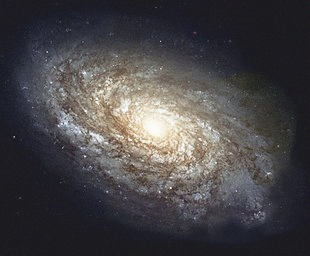

In [34]:
denoised_image_80 = averageDenoising(80)
denoised_image_80 /= 80
denoised_image_80 = np.uint8(denoised_image_80)
print(PNSR(imgTgs3[0],denoised_image_80))
cv2_imshow(denoised_image_80)

100 Jumlah Citra di Average

28.940353242916007


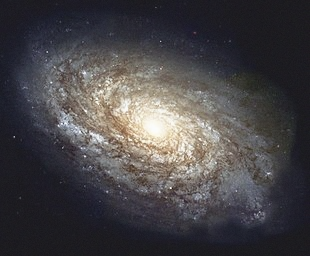

In [35]:
denoised_image_100 = averageDenoising(100)
denoised_image_100 /= 100
denoised_image_100 = np.uint8(denoised_image_100)
print(PNSR(imgTgs3[0],denoised_image_100))
cv2_imshow(denoised_image_100)

Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah peningkatan jumlah citra yang di-average tidak menjamin peningkatan kualitas citra, terutama jika ada ketidaksesuaian dalam distribusi noise pada gambar-gambar tersebut.

4. Buat image masking untuk image berikut

In [36]:
couple = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/couple.tiff')

imgTgs4 = couple.copy()
imgTgs4 = cv.cvtColor(imgTgs4, cv.COLOR_BGR2RGB)

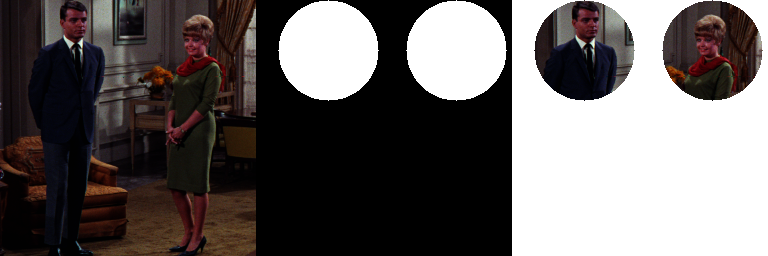

In [44]:
mask = np.zeros(imgTgs4.shape, dtype=np.uint8)
mask = cv.circle(mask, (72, 50), 50, (255,255,255), -1)
mask = cv.circle(mask, (200, 50), 50, (255,255,255), -1)

result = cv.bitwise_and(imgTgs4, mask)
result[mask==0] = 255

imgTgs4 = cv.cvtColor(imgTgs4, cv.COLOR_BGR2RGB)
result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
cv2_imshow(cv.hconcat([imgTgs4, mask, result]))

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

NOT
(komplemen)

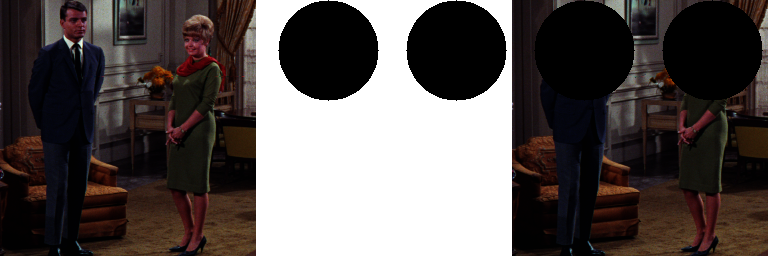

In [45]:
mask_not = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)

mask_not = cv.circle(mask_not, (72, 50), 50, 255, -1)
mask_not = cv.circle(mask_not, (200, 50), 50, 255, -1)

combine = cv.bitwise_not(mask_not)

result = cv.bitwise_and(imgTgs4, imgTgs4, mask=combine)

combine = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

cv2_imshow(cv.hconcat([imgTgs4, combine, result]))

OR (Atau)

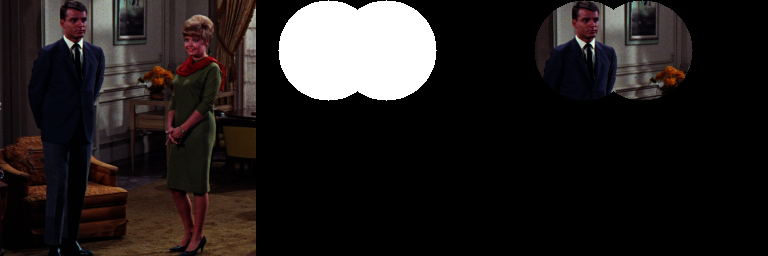

In [47]:
mask_or = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)
mask_or2 = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)

mask_or = cv.circle(mask_or, (72, 50), 50, 255, -1)
mask_or22 = cv.circle(mask_or2, (130, 50), 50, 255, -1)

combine = cv.bitwise_or(mask_or, mask_or2)

result = cv.bitwise_and(imgTgs4, imgTgs4, mask=combine)

combine = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

cv2_imshow(cv.hconcat([imgTgs4, combine, result]))

AND (Dan)

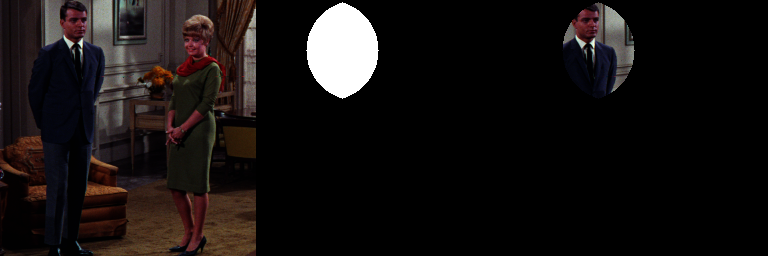

In [49]:
mask_and = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)
mask_and2 = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)

mask_and = cv.circle(mask_and, (72, 50), 50, 255, -1)
mask_and2 = cv.circle(mask_and2, (100, 50), 50, 255, -1)

combine = cv.bitwise_and(mask_and, mask_and2)

result = cv.bitwise_and(imgTgs4, imgTgs4, mask=combine)

combine = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

cv2_imshow(cv.hconcat([imgTgs4, combine, result]))

NAND (Not
And)

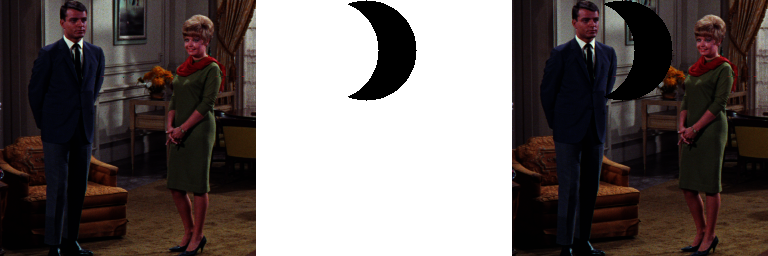

In [52]:
mask_nand = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)
mask_nand2 = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)

mask_nand = cv.circle(mask_nand, (72, 50), 50, 255, -1)
mask_nand2 = cv.circle(mask_nand2, (110, 50), 50, 255, -1)

combine = cv.bitwise_or(mask_nand, cv.bitwise_not(mask_nand2))

result = cv.bitwise_and(imgTgs4, imgTgs4, mask=combine)

combine = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

cv2_imshow(cv.hconcat([imgTgs4, combine, result]))

XOR
(Exlusive Or)

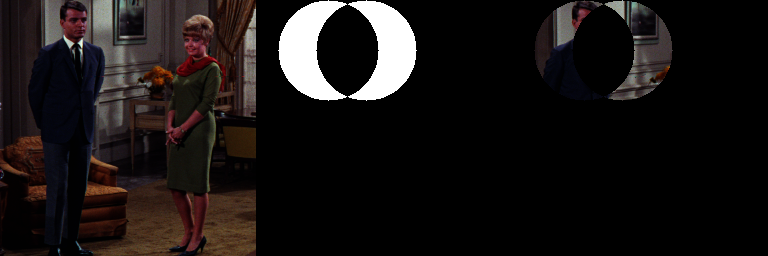

In [53]:
mask_xor = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)
mask_xor2 = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)

mask_xor = cv.circle(mask_xor, (72, 50), 50, 255, -1)
mask_xor2 = cv.circle(mask_xor2, (110, 50), 50, 255, -1)

combine = cv.bitwise_xor(mask_xor, mask_xor2)

result = cv.bitwise_and(imgTgs4, imgTgs4, mask=combine)

combine = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

cv2_imshow(cv.hconcat([imgTgs4, combine, result]))

Tuliskan hasil analisa anda:

- Untuk operator NOT (Komplemen) area di luar lingkaran akan dipertahankan dari citra asli, sedangkan area dalam lingkaran akan menjadi hitam karena mask yang terinversi.

- Untuk operator OR (Atau) lingkaran berwarna putih dan area di dalam lingkaran anak menunjukkan citra asli sedangkan area diluar lingkaran akan menjadi hitam.

- Untuk operator AND (Dan) hanya area di mana kedua lingkaran tumpang tindih yang muncul berwarna putih, menunjukkan bahwa operator AND hanya mengambil bagian yang berada di kedua mask sekaligus.

- Untuk operator NAND (Not And) area tumpang tindih dari lingkaran dihilangkan (berwarna hitam), sedangkan bagian lain tetap terlihat.

- Untuk operator XOR (Exclusive Or) bagian di luar irisan (hanya salah satu lingkaran) muncul sebagai warna putih, menunjukkan bahwa operator XOR mengambil bagian yang unik untuk masing-masing mask.